# **Naive Bayes model for HMEQ Dataset**

In [1]:
from src import utilities
from src import evaluation

from sklearn.naive_bayes import GaussianNB

hmeq_dataset_path = '../../../datasets/preprocessed/hmeq/'

2023-03-14 18:44:23.085166: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 18:44:23.634082: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-14 18:44:23.634127: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-14 18:44:23.634131: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Model save_path: ../../../models/GNB/2023-03-14_18-44-24
Selected Features: ['debt-to-income', 'curr-prop-val', 'oldest-credit-line', 'loan-amount', 'job', 'credit-inquiries', 'credit-lines', 'existing-amount-due', 'years-at-job', 'derogatories', 'loan-reason']


5it [00:00, 56.53it/s]
/home/rr/DevOps/credit_scoring_benchmark/src/metrics.py:188: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metrics_df.loc['mean'] = metrics_df.mean()


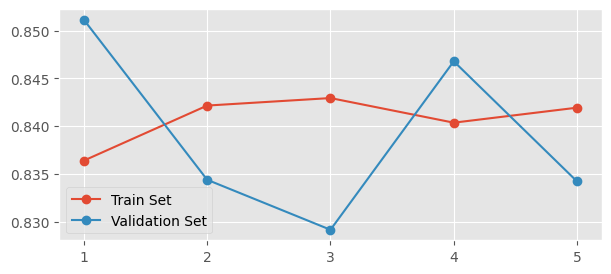

Average Train Set Accuracy: 0.8407612843899244
Average Validation Set Accuracy: 0.839136479527301


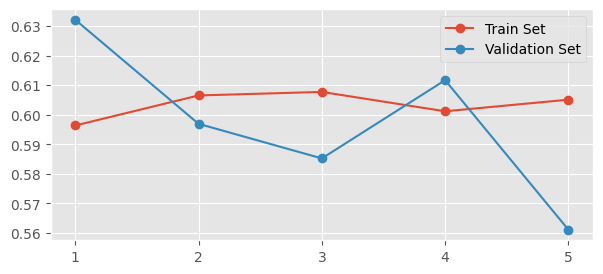

Average Train Set F1 Score: 0.6033856208153632
Average Validation Set F1 Score: 0.5974236193784789


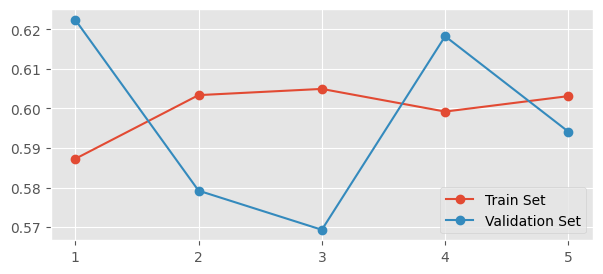

Average Train Set Precision: 0.5995892795838073
Average Validation Set Precision: 0.5966722096056564


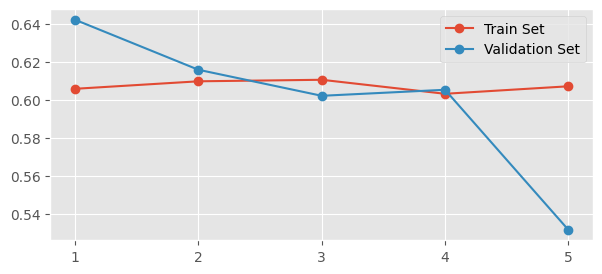

Average Train Set Recall: 0.6072563801092745
Average Validation Set Recall: 0.599366216588592


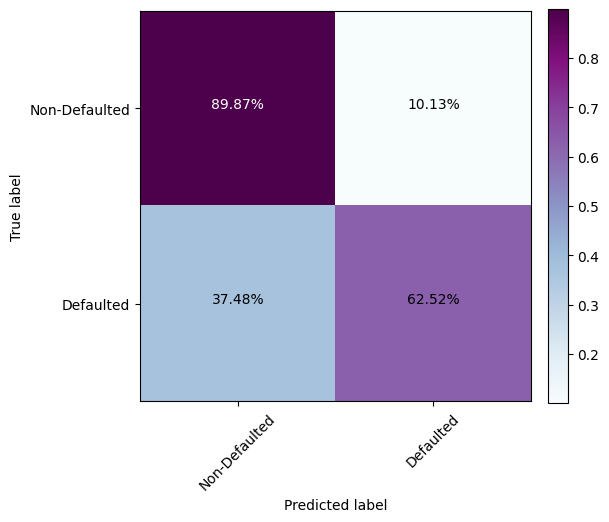

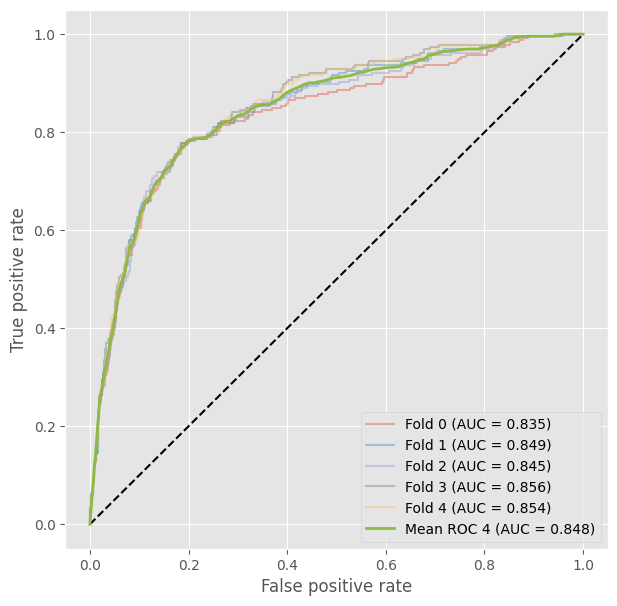

Gini derived from mean AUC 0.6959341312282488


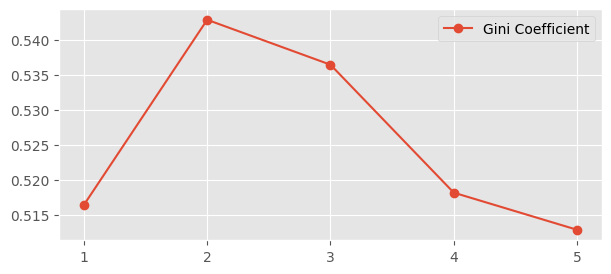

Average Gini Coefficient: 0.5253774465761147


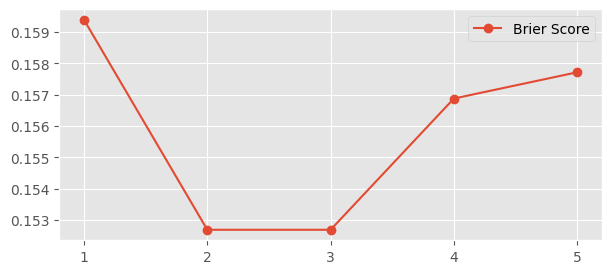

Average Brier Score: 0.15587248322147654


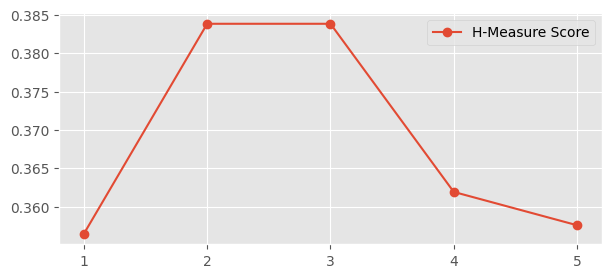

Average H-Measure Score: 0.3687218158754023


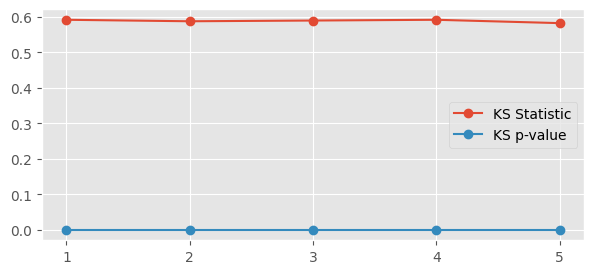

Average Kolmogorov-Smirnov Statistic: 0.5886316790867291
Average Kolmogorov-Smirnov p-value: 1.7733490285360838e-61


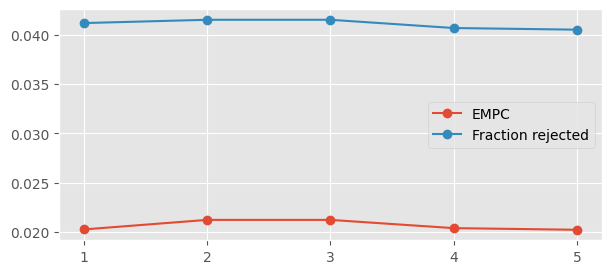

Average EMP: 0.020646333836313674
Average EMP Fractions: 0.04110541191838206


In [2]:
features_scores = utilities.read_features_scores(hmeq_dataset_path)
train_data = utilities.read_parquet(hmeq_dataset_path + 'train.parquet')
test_data = utilities.read_parquet(hmeq_dataset_path + 'test.parquet')

gnbc = GaussianNB()

evaluation.k_fold_cross_validate(model=gnbc, train_data=train_data,
                                 test_data=test_data, target='defaulted',
                                 classes=['Non-Defaulted', 'Defaulted'],
                                 k_folds=5, features_scores=features_scores,
                                 features=11, model_name='GNB', learning_rate=None,
                                 epochs=None, batch_size=None, verbose=False)